In [292]:
#Title: Feature Scaling, Selection, and Constant Column Removal in Machine Learning with the Breast Cancer Dataset

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
#Loading  the dataset

In [295]:
data=pd.read_csv("C:/Users/viraj/Downloads/Breast Cancer Dataset.csv")

In [296]:
df=pd.DataFrame(data)

In [297]:
df

,Unnamed: 0,Patient_ID,Age,Tumor_Type,Cancer_Stage,Family_History,BMI,Radiation_Therapy,Chemotherapy,Survival_Status,Genetic_Mutation,Tumor_Type_Encoded,Cancer_Stage_Encoded,Survival_Status_Encoded,skin_color,Target
0,0,1,63,Type_C,Stage_II,Yes,19.451607,Yes,No,Deceased,Mutation_A,Type_B,Stage_IV,Deceased,white,Negative
1,1,2,53,Type_B,Stage_I,No,28.581607,No,No,Alive,Mutation_A,Type_A,Stage_I,Alive,white,Negative
2,2,3,39,Type_A,Stage_II,No,24.843261,No,Yes,Alive,Mutation_B,Type_C,Stage_I,Alive,white,Negative
3,3,4,32,Type_C,Stage_I,Yes,20.395594,Yes,Yes,Deceased,No_Mutation,Type_B,Stage_IV,Deceased,white,Negative
4,4,5,45,Type_C,Stage_II,No,23.229434,Yes,Yes,Deceased,Mutation_B,Type_C,Stage_I,Deceased,white,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,46,Type_A,Stage_IV,No,26.372573,No,No,Alive,Mutation_A,Type_B,Stage_II,Deceased,white,Positive
196,196,197,35,Type_C,Stage_I,Yes,19.510483,Yes,Yes,Deceased,Mutation_A,Type_A,Stage_I,Alive,white,Negative
197,197,198,40,Type_C,Stage_III,Yes,20.096485,Yes,Yes,Alive,Mutation_A,Type_C,Stage_I,Deceased,white,Negative
198,198,199,57,Type_B,Stage_IV,Yes,18.531175,No,Yes,Alive,Mutation_B,Type_B,Stage_II,Deceased,white,Negative


In [298]:
data.describe()

,Unnamed: 0,Patient_ID,Age,BMI
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,44.575000,24.224489
std,57.879185,57.879185,12.026954,3.266019
min,0.000000,1.000000,25.000000,18.529843
25%,49.750000,50.750000,33.000000,21.371206
50%,99.500000,100.500000,46.000000,24.601358
75%,149.250000,150.250000,56.000000,26.968497
max,199.000000,200.000000,64.000000,29.968439


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   Patient_ID               200 non-null    int64  
 2   Age                      200 non-null    int64  
 3   Tumor_Type               200 non-null    object 
 4   Cancer_Stage             200 non-null    object 
 5   Family_History           200 non-null    object 
 6   BMI                      200 non-null    float64
 7   Radiation_Therapy        200 non-null    object 
 8   Chemotherapy             200 non-null    object 
 9   Survival_Status          200 non-null    object 
 10  Genetic_Mutation         200 non-null    object 
 11  Tumor_Type_Encoded       200 non-null    object 
 12  Cancer_Stage_Encoded     200 non-null    object 
 13  Survival_Status_Encoded  200 non-null    object 
 14  skin_color               2

In [300]:
data.var()

C:\Users\viraj\AppData\Local\Temp\ipykernel_2948\445316826.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


Unnamed: 0    3350.000000
Patient_ID    3350.000000
Age            144.647613
BMI             10.666883
dtype: float64

In [301]:
data

,Unnamed: 0,Patient_ID,Age,Tumor_Type,Cancer_Stage,Family_History,BMI,Radiation_Therapy,Chemotherapy,Survival_Status,Genetic_Mutation,Tumor_Type_Encoded,Cancer_Stage_Encoded,Survival_Status_Encoded,skin_color,Target
0,0,1,63,Type_C,Stage_II,Yes,19.451607,Yes,No,Deceased,Mutation_A,Type_B,Stage_IV,Deceased,white,Negative
1,1,2,53,Type_B,Stage_I,No,28.581607,No,No,Alive,Mutation_A,Type_A,Stage_I,Alive,white,Negative
2,2,3,39,Type_A,Stage_II,No,24.843261,No,Yes,Alive,Mutation_B,Type_C,Stage_I,Alive,white,Negative
3,3,4,32,Type_C,Stage_I,Yes,20.395594,Yes,Yes,Deceased,No_Mutation,Type_B,Stage_IV,Deceased,white,Negative
4,4,5,45,Type_C,Stage_II,No,23.229434,Yes,Yes,Deceased,Mutation_B,Type_C,Stage_I,Deceased,white,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,46,Type_A,Stage_IV,No,26.372573,No,No,Alive,Mutation_A,Type_B,Stage_II,Deceased,white,Positive
196,196,197,35,Type_C,Stage_I,Yes,19.510483,Yes,Yes,Deceased,Mutation_A,Type_A,Stage_I,Alive,white,Negative
197,197,198,40,Type_C,Stage_III,Yes,20.096485,Yes,Yes,Alive,Mutation_A,Type_C,Stage_I,Deceased,white,Negative
198,198,199,57,Type_B,Stage_IV,Yes,18.531175,No,Yes,Alive,Mutation_B,Type_B,Stage_II,Deceased,white,Negative


In [302]:
data.drop('Unnamed: 0',inplace=True,axis=1)#Dropping unwanted data
data.drop('skin_color',inplace=True,axis=1)#dropping constant coloums

In [303]:
data

,Patient_ID,Age,Tumor_Type,Cancer_Stage,Family_History,BMI,Radiation_Therapy,Chemotherapy,Survival_Status,Genetic_Mutation,Tumor_Type_Encoded,Cancer_Stage_Encoded,Survival_Status_Encoded,Target
0,1,63,Type_C,Stage_II,Yes,19.451607,Yes,No,Deceased,Mutation_A,Type_B,Stage_IV,Deceased,Negative
1,2,53,Type_B,Stage_I,No,28.581607,No,No,Alive,Mutation_A,Type_A,Stage_I,Alive,Negative
2,3,39,Type_A,Stage_II,No,24.843261,No,Yes,Alive,Mutation_B,Type_C,Stage_I,Alive,Negative
3,4,32,Type_C,Stage_I,Yes,20.395594,Yes,Yes,Deceased,No_Mutation,Type_B,Stage_IV,Deceased,Negative
4,5,45,Type_C,Stage_II,No,23.229434,Yes,Yes,Deceased,Mutation_B,Type_C,Stage_I,Deceased,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,46,Type_A,Stage_IV,No,26.372573,No,No,Alive,Mutation_A,Type_B,Stage_II,Deceased,Positive
196,197,35,Type_C,Stage_I,Yes,19.510483,Yes,Yes,Deceased,Mutation_A,Type_A,Stage_I,Alive,Negative
197,198,40,Type_C,Stage_III,Yes,20.096485,Yes,Yes,Alive,Mutation_A,Type_C,Stage_I,Deceased,Negative
198,199,57,Type_B,Stage_IV,Yes,18.531175,No,Yes,Alive,Mutation_B,Type_B,Stage_II,Deceased,Negative


In [304]:
data.columns

Index(['Patient_ID', 'Age', 'Tumor_Type', 'Cancer_Stage', 'Family_History',
       'BMI', 'Radiation_Therapy', 'Chemotherapy', 'Survival_Status',
       'Genetic_Mutation', 'Tumor_Type_Encoded', 'Cancer_Stage_Encoded',
       'Survival_Status_Encoded', 'Target'],
      dtype='object')

In [305]:
from sklearn.preprocessing import LabelEncoder #Using label encoder to encode categorical data
le=LabelEncoder()

In [306]:
x=['Tumor_Type','Cancer_Stage','Family_History','Radiation_Therapy','Chemotherapy','Survival_Status','Genetic_Mutation','Tumor_Type_Encoded','Cancer_Stage_Encoded','Survival_Status_Encoded','Target']
for i in x:
    data[i]=le.fit_transform(data[i])
print(data[x])

     Tumor_Type  Cancer_Stage  Family_History  Radiation_Therapy  \
0             2             1               1                  1   
1             1             0               0                  0   
2             0             1               0                  0   
3             2             0               1                  1   
4             2             1               0                  1   
..          ...           ...             ...                ...   
195           0             3               0                  0   
196           2             0               1                  1   
197           2             2               1                  1   
198           1             3               1                  0   
199           2             1               0                  0   

     Chemotherapy  Survival_Status  Genetic_Mutation  Tumor_Type_Encoded  \
0               0                1                 0                   1   
1               0              

In [307]:
from sklearn.preprocessing import StandardScaler

In [308]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)#Scaling data

In [309]:
scaled_data

array([[-1.7234121 ,  1.53582001,  1.20666232, ...,  1.35694185,
         1.03046381, -0.25264558],
       [-1.70609137,  0.70226776, -0.02462576, ..., -1.39361596,
        -0.97043679, -0.25264558],
       [-1.68877065, -0.46470537, -1.25591385, ..., -1.39361596,
        -0.97043679, -0.25264558],
       ...,
       [ 1.68877065, -0.38135015,  1.20666232, ..., -1.39361596,
         1.03046381, -0.25264558],
       [ 1.70609137,  1.03568866, -0.02462576, ..., -0.47676335,
         1.03046381, -0.25264558],
       [ 1.7234121 , -0.96483672,  1.20666232, ..., -0.47676335,
         1.03046381, -0.25264558]])

In [310]:
from sklearn.preprocessing import MinMaxScaler#Normalising data
Normalizer=MinMaxScaler()
normalizer_data=Normalizer.fit_transform(data)
normalizer_data

array([[0.        , 0.97435897, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.00502513, 0.71794872, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.01005025, 0.35897436, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98994975, 0.38461538, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.99497487, 0.82051282, 0.5       , ..., 0.33333333, 1.        ,
        0.        ],
       [1.        , 0.20512821, 1.        , ..., 0.33333333, 1.        ,
        0.        ]])

In [311]:
corr_matrix=data.corr()

In [312]:
corr_matrix #Finding the corellation matrix

,Patient_ID,Age,Tumor_Type,Cancer_Stage,Family_History,BMI,Radiation_Therapy,Chemotherapy,Survival_Status,Genetic_Mutation,Tumor_Type_Encoded,Cancer_Stage_Encoded,Survival_Status_Encoded,Target
Patient_ID,1.000000,0.002054,0.009171,0.037807,-0.093215,-0.011545,-0.042444,-0.055678,-0.118324,-0.134255,-0.034422,0.001191,0.031971,0.077309
Age,0.002054,1.000000,-0.071485,-0.007930,0.044755,-0.078397,-0.031390,-0.025851,-0.056985,0.025697,-0.000368,-0.030493,0.040216,0.194974
Tumor_Type,0.009171,-0.071485,1.000000,-0.023925,0.011095,0.017462,-0.012808,-0.077054,0.062069,0.068812,0.074497,-0.034319,0.099287,-0.317301
Cancer_Stage,0.037807,-0.007930,-0.023925,1.000000,-0.046514,-0.055408,0.014512,-0.066971,-0.090893,0.061594,0.055856,0.069704,0.031281,0.344064
Family_History,-0.093215,0.044755,0.011095,-0.046514,1.000000,0.004781,0.109158,-0.025688,0.031045,0.063863,0.041747,0.031212,0.081639,-0.096969
BMI,-0.011545,-0.078397,0.017462,-0.055408,0.004781,1.000000,-0.041912,0.091440,0.087098,0.021873,-0.048320,0.001635,0.009834,0.026304
Radiation_Therapy,-0.042444,-0.031390,-0.012808,0.014512,0.109158,-0.041912,1.000000,-0.072655,-0.019608,-0.047391,0.078779,-0.000367,0.070646,-0.089286
Chemotherapy,-0.055678,-0.025851,-0.077054,-0.066971,-0.025688,0.091440,-0.072655,1.000000,0.032403,-0.091064,-0.069385,-0.015866,0.063715,-0.112690
Survival_Status,-0.118324,-0.056985,0.062069,-0.090893,0.031045,0.087098,-0.019608,0.032403,1.000000,0.047391,-0.030075,-0.164700,-0.150698,-0.037062
Genetic_Mutation,-0.134255,0.025697,0.068812,0.061594,0.063863,0.021873,-0.047391,-0.091064,0.047391,1.000000,-0.065445,0.140351,-0.013978,-0.010231


In [313]:
corr_matrix.columns

Index(['Patient_ID', 'Age', 'Tumor_Type', 'Cancer_Stage', 'Family_History',
       'BMI', 'Radiation_Therapy', 'Chemotherapy', 'Survival_Status',
       'Genetic_Mutation', 'Tumor_Type_Encoded', 'Cancer_Stage_Encoded',
       'Survival_Status_Encoded', 'Target'],
      dtype='object')

In [314]:
len(corr_matrix)

14

In [315]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [316]:
positivethreshold = 0.5
negativethreshold = -0.5
for row in range(len(corr_matrix)):
    for  col in range(row):
        if corr_matrix.iloc[row][col] > positivethreshold or corr_matrix.iloc[row][col] < negativethreshold:
            print(corr_matrix.columns[col])

In [317]:
#To find highly correlated coloums

In [318]:
positivethreshold = 0.5
negativethreshold = -0.5
corr_columns = set()
for row in range(len(corr_matrix)):
    for  col in range(row):
        if corr_matrix.iloc[row][col] > positivethreshold or corr_matrix.iloc[row][col] < negativethreshold:
            print(corr_matrix.columns[col])
            corr_columns.add(corr_matrix.columns[col])

In [319]:
#plotting the Heatmap for correlated data

<Axes: >

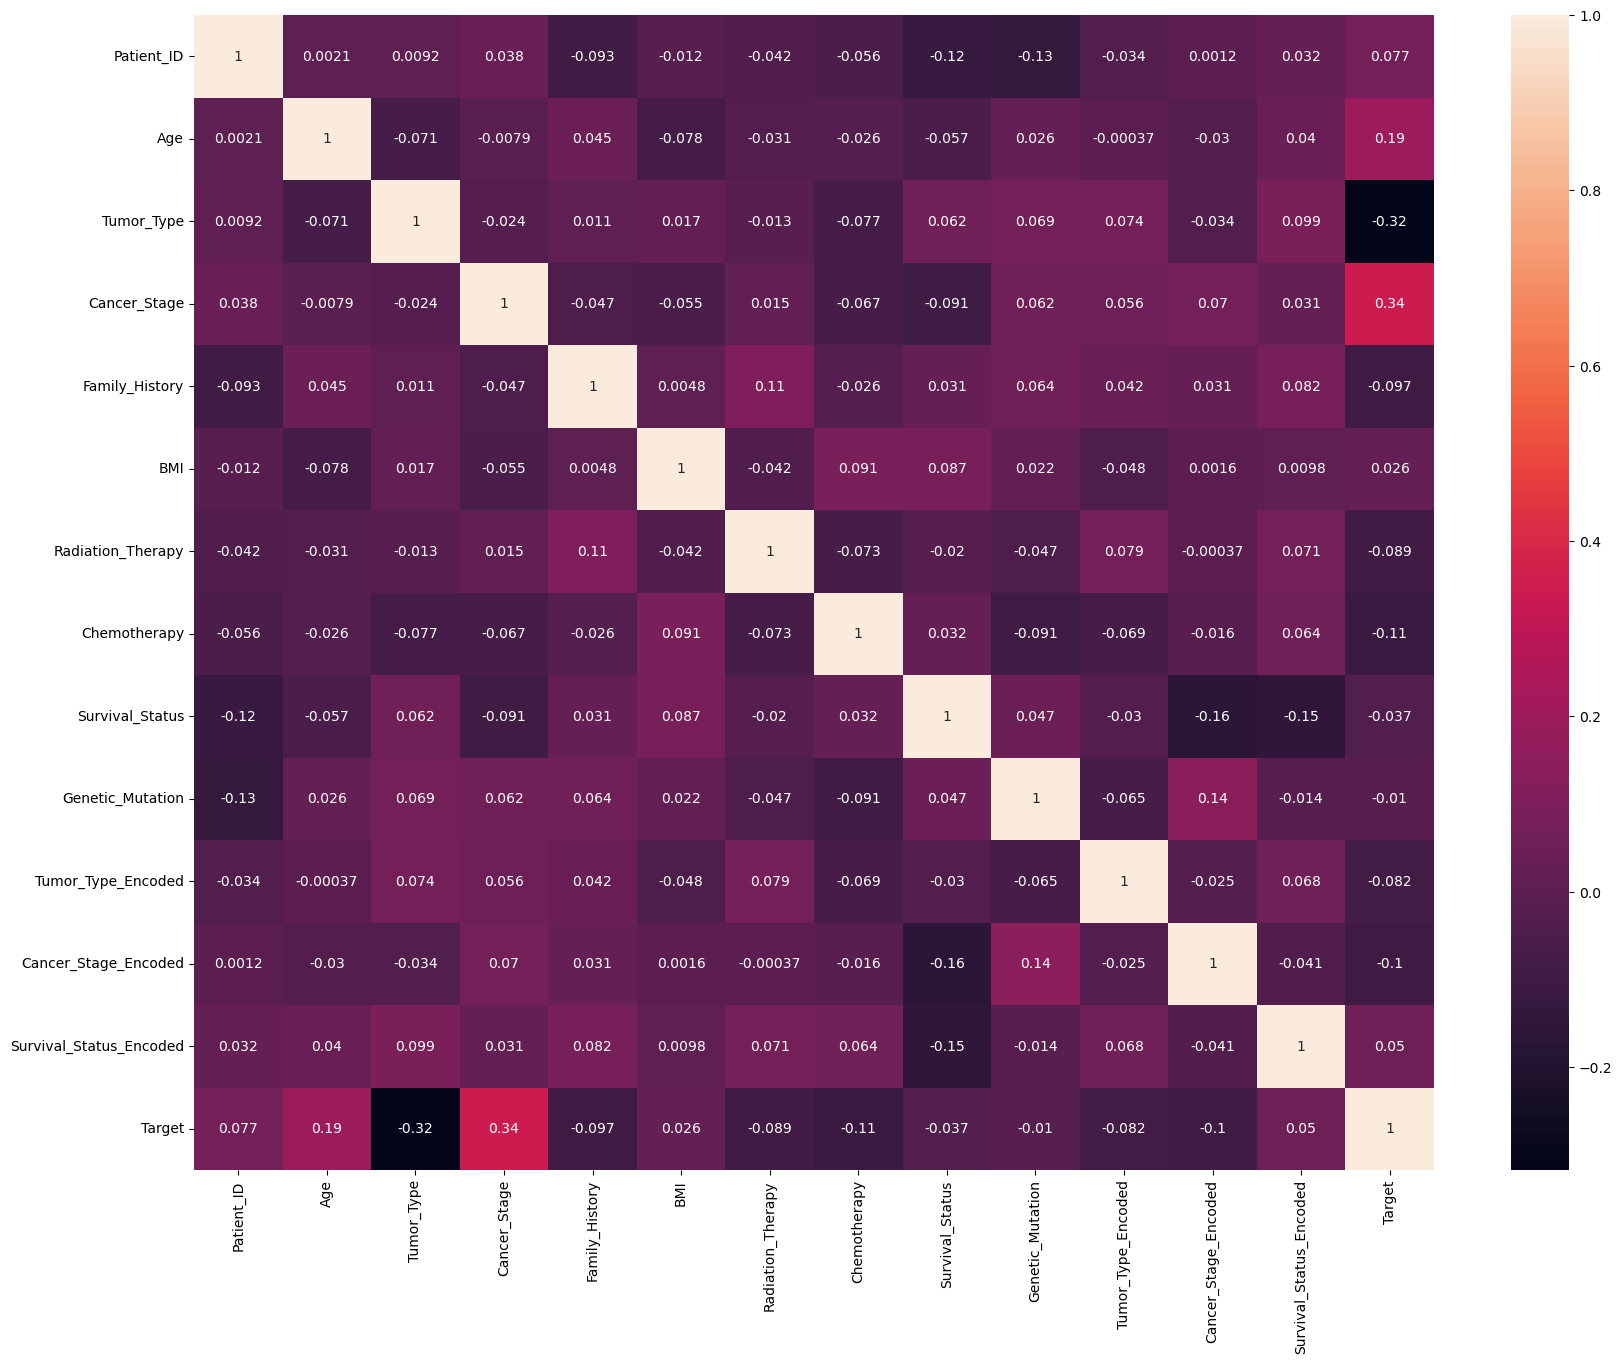

In [320]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

In [321]:
from sklearn.preprocessing import OneHotEncoder #One hot encoding

In [322]:
Encorder=OneHotEncoder(sparse=False)

In [323]:
ohn=Encorder.fit_transform(data)

C:\Users\viraj\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [324]:
ohn

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [325]:
#Finding Kbest and best features for the data set

In [326]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target variable
X = data.drop('Target', axis=1)  # Replace 'target_variable' with your actual target variable column name
y = data['Target']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top k features
k = 5  # Adjust the value of k as needed
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(xtrain, ytrain)
X_test_selected = selector.transform(xtest)

# Display selected feature names
selected_feature_names = X.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

Selected features: Index(['Age', 'Tumor_Type', 'Cancer_Stage', 'Family_History',
       'Survival_Status_Encoded'],
      dtype='object')
